In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

warnings.filterwarnings('ignore')

# **Read Data**

In [ ]:
df = pd.read_csv("Dataset_A_loan.csv")

In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


In [ ]:
df.shape

(45000, 14)

Dalam dataset ini, ada total **45.000 data dan 14 kolom** yang berisi berbagai informasi penting yang bisa dipakai buat proses analisis atau membuat model prediksi.

In [ ]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

Dalam dataset ini terdapat 14 kolom:

- **person_age** – Usia dari orang yang mengajukan pinjaman
- **person_gender** – Jenis kelamin dari orang tersebut
- **person_education** – Tingkat pendidikan tertinggi yang sudah ditempuh
- **person_income** – Pendapatan tahunan dari si peminjam
- **person_emp_exp** – Lama pengalaman kerja (dalam tahun)
- **person_home_ownership** – Status kepemilikan tempat tinggal (misalnya milik sendiri, kontrak, atau tinggal dengan keluarga)
- **loan_amnt** – Jumlah pinjaman yang diajukan
- **loan_intent** – Tujuan dari pinjaman tersebut (seperti untuk pendidikan, mobil, usaha, dll.)
- **loan_int_rate** – Suku bunga pinjaman yang dikenakan
- **loan_percent_income** – Perbandingan antara jumlah pinjaman dengan pendapatan tahunan
- **cb_person_cred_hist_length** – Panjang riwayat kredit dalam tahun
- **credit_score** – Skor kredit yang menggambarkan seberapa baik riwayat pembayaran si peminjam
- **previous_loan_defaults_on_file** – Apakah sebelumnya pernah gagal bayar pinjaman
- **loan_status** – Ini adalah kolom target (yang diprediksi); nilainya 1 kalau pinjaman disetujui, dan 0 kalau ditolak

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Dataset ini terdiri dari 14 kolom, yang terbagi ke dalam tipe data numerik dan kategorikal. Kolom yang bersifat numerik antara lain: p**erson_age, person_income, person_emp_exp, loan_amnt, loan_int_rate, loan_percent_income, cb_person_cred_hist_length, dan credit_score.** Sementara itu, kolom yang bersifat kategorikal meliputi: **person_gender, person_education, person_home_ownership, loan_intent, previous_loan_defaults_on_file, dan loan_status.** Dari semua kolom tersebut, hanya **person_income** yang memiliki **missing values sebanyak 2.250 entri**, sedangkan kolom lainnya lengkap.

In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.275000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.018223e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,7.331158e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.726725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.705500e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.582125e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,5.556399e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


Berdasarkan statistik deskriptif dari seluruh data yang berjumlah 45.000 baris, terlihat bahwa sebagian besar fitur numerik memiliki rentang nilai yang cukup lebar dan ada beberapa nilai ekstrem (outlier).

- Kolom person_age memiliki nilai minimum 20 tahun dan maksimum yang tidak biasa, yaitu 144 tahun, yang kemungkinan merupakan data anomali.
- person_income memiliki rata-rata sekitar 80.182, namun nilai maksimumnya sangat tinggi, yaitu lebih dari 5 juta, menunjukkan kemungkinan outlier yang signifikan.
- Pengalaman kerja (person_emp_exp) juga menunjukkan nilai maksimum mencapai 125 tahun.
- Kolom loan_amnt (jumlah pinjaman), loan_int_rate (suku bunga), dan loan_percent_income (rasio pinjaman terhadap pendapatan) menunjukkan distribusi yang lebih wajar.
- Riwayat kredit (cb_person_cred_hist_length) dan credit_score memiliki nilai maksimum yang tinggi namun masih dalam batas wajar. T

- Target variabel loan_status menunjukkan bahwa hanya sekitar 22% dari pinjaman yang disetujui (nilai 1), sementara sisanya ditolak (nilai 0), yang menunjukkan adanya ketidakseimbangan kelas (class imbalance) pada data ini.

# **Splitting Data**

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
# loan status keluarkan dari numerical dan masukan ke categorical
numeric_columns = np.delete(numeric_columns, np.where(numeric_columns == 'loan_status'))
categorical_columns = np.append(categorical_columns, 'loan_status')

# **Check Unique Value**

In [ ]:
for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print()

Unique values in person_gender:
['female' 'male' 'Male' 'fe male']

Unique values in person_education:
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']

Unique values in person_home_ownership:
['RENT' 'OWN' 'MORTGAGE' 'OTHER']

Unique values in loan_intent:
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

Unique values in previous_loan_defaults_on_file:
['No' 'Yes']

Unique values in loan_status:
[1 0]



**Check person_gender**

In [ ]:
df['person_gender'].value_counts()

,count
person_gender,
male,24799
female,20111
Male,45
fe male,45


Berdasarkan data pada kolom person_gender, terlihat bahwa ada inkonsistensi penulisan dalam label gender.

# **Handling Inconsistency**

In [ ]:
df['person_gender'].replace('fe male', "female", inplace=True)
df['person_gender'].replace('Male', "male", inplace=True)

In [ ]:
df['person_gender'].value_counts()

,count
person_gender,
male,24844
female,20156


#**Check Duplicate**

In [ ]:
df.duplicated().sum()

np.int64(0)

Dataset ini tidak mengandung data duplikat, sehingga setiap baris merepresentasikan data tanpa ada pengulangan informasi.

# **Check Missing Value**

In [ ]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,2250
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


Dalam dataset ini, hanya kolom **person_income** yang memiliki **missing value**, yaitu sebanyak **2.250** yang belum terisi. Sementara itu, seluruh kolom lainnya terisi lengkap tanpa ada nilai yang hilang.

# **Handling Missing Value**

**Check Outlier for Handling Missing Value**

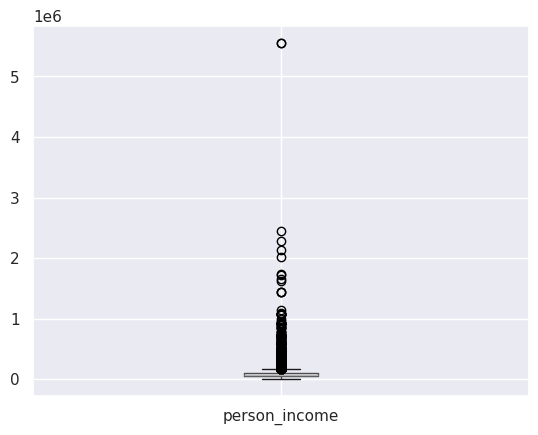

In [ ]:
boxplot = df.boxplot(column=['person_income'])
plt.show()


Karena **banyak outlier di person_income**, nilai kosongnya **diisi dengan  median** agar hasilnya nggak ke-distract sama data ekstrem. Median dipilih karena lebih aman dan stabil dibanding rata-rata.

**Count Median of person_income**

**Fill Missing Value with Median**

In [ ]:
df['person_income'].fillna(df['person_income'].median(), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

# **Data Exploration**

**Categorical**

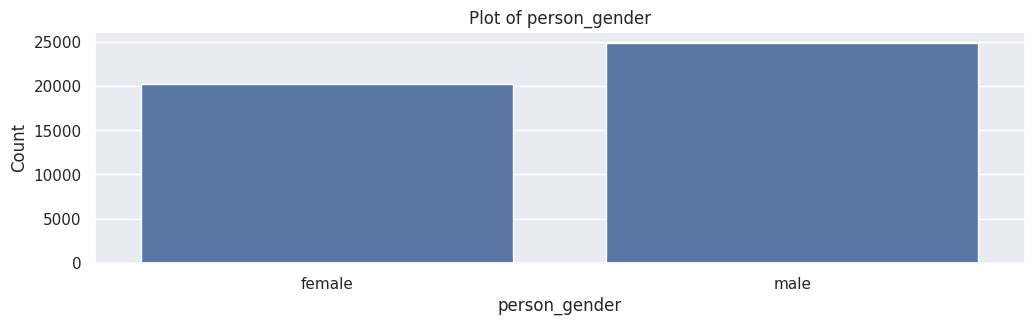

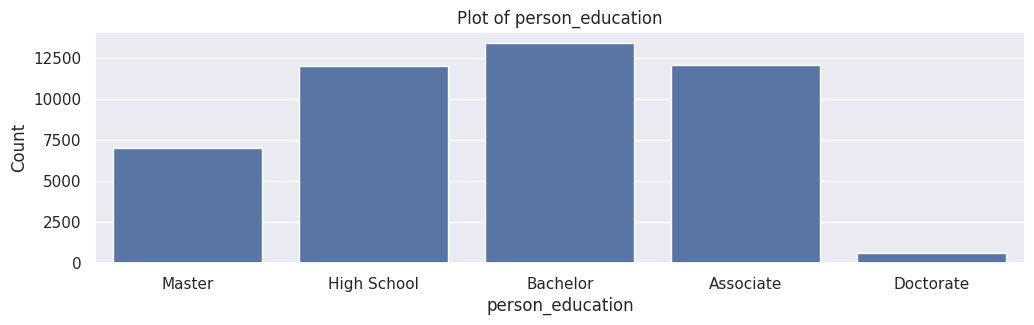

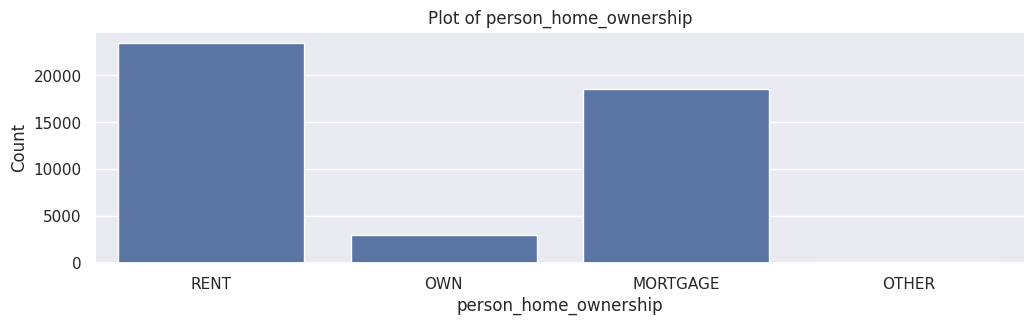

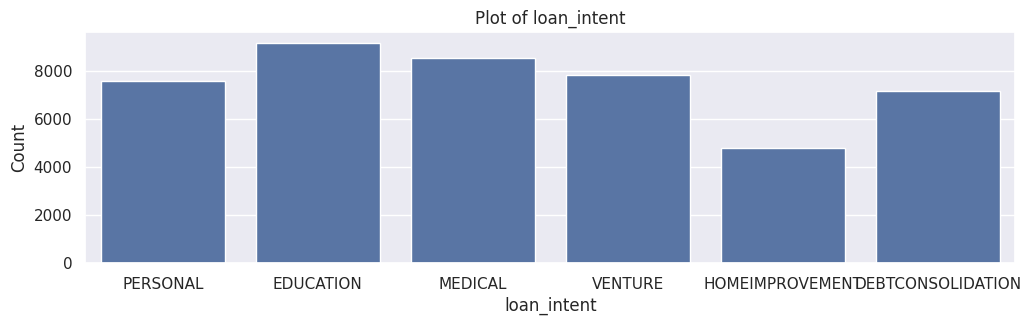

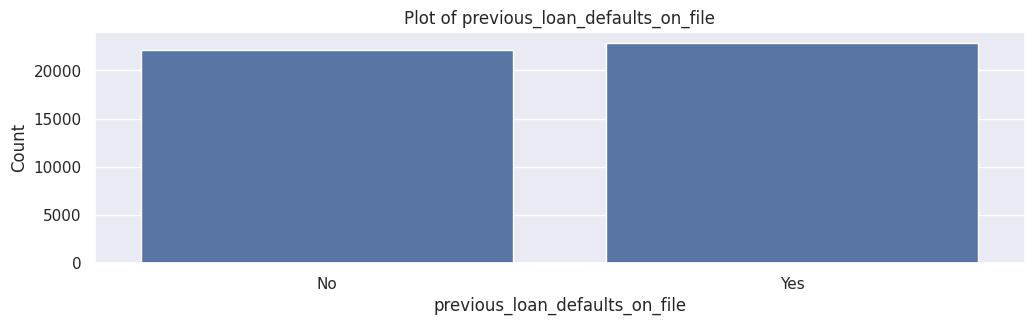

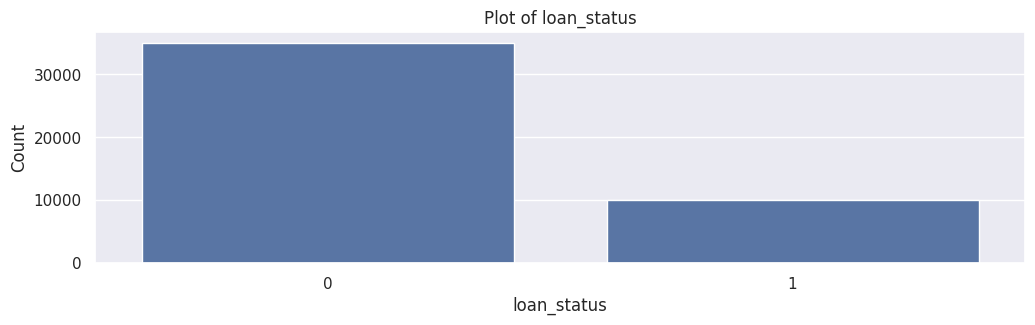

In [ ]:
#plot categorical
for col in categorical_columns:
    plt.figure(figsize=(12, 3))
    sns.countplot(data=df, x=col)
    plt.title(f'Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')


Berdasarkan visualisasi:

- **person_gender**: Data terbagi cukup seimbang antara male dan female, dengan sedikit lebih banyak laki-laki.

- **person_education**: Pendidikan terbanyak adalah High School, Bachelor, dan Associate, sedangkan Doctorate paling sedikit.

- **person_home_ownership**: Mayoritas responden tinggal di rumah RENT (sewa) dan MORTGAGE (cicilan), sedangkan yang OWN (milik sendiri) jauh lebih sedikit.

- **loan_intent**: Tujuan pinjaman paling umum adalah untuk EDUCATION, PERSONAL, dan MEDICAL, sedangkan VENTURE dan DEBTCONSOLIDATION paling rendah.

- **previous_loan_defaults_on_file**: Terlihat cukup seimbang antara yang pernah menunggak pinjaman sebelumnya (Yes) dan yang tidak (No), meskipun jumlah No sedikit lebih besar.

- **loan_status**: Mayoritas pengajuan pinjaman ditolak (label 0), sedangkan yang disetujui (1) jauh lebih sedikit, menunjukkan adanya class imbalance.

**Percentage Categorical**

In [ ]:
for col in categorical_columns:
    print(f"Percentage of {col}:")
    percentages = (df[col].value_counts(normalize=True) * 100).round(2).astype(str) + ' %'
    print(percentages.to_string())
    print()

Percentage of person_gender:
person_gender
male      55.21 %
female    44.79 %

Percentage of person_education:
person_education
Bachelor       29.78 %
Associate      26.73 %
High School     26.6 %
Master         15.51 %
Doctorate       1.38 %

Percentage of person_home_ownership:
person_home_ownership
RENT         52.1 %
MORTGAGE    41.09 %
OWN          6.56 %
OTHER        0.26 %

Percentage of loan_intent:
loan_intent
EDUCATION            20.34 %
MEDICAL               19.0 %
VENTURE              17.38 %
PERSONAL             16.78 %
DEBTCONSOLIDATION    15.88 %
HOMEIMPROVEMENT      10.63 %

Percentage of previous_loan_defaults_on_file:
previous_loan_defaults_on_file
Yes    50.8 %
No     49.2 %

Percentage of loan_status:
loan_status
0    77.78 %
1    22.22 %



Distribusi data berdasarkan jenis kelamin menunjukkan bahwa laki-laki mendominasi sebesar 55,21%, sedangkan perempuan sebanyak 44,79%. Dari sisi pendidikan, mayoritas responden memiliki gelar Bachelor (29,78%), diikuti oleh Associate (26,73%) dan High School (26,6%), sementara Doctorate hanya mencakup 1,38% populasi. Untuk kepemilikan tempat tinggal, sebagian besar tinggal di rumah sewa (RENT) sebesar 52,1%, disusul oleh KPR (MORTGAGE) 41,09%, dan hanya 6,56% yang memiliki rumah sendiri (OWN). Tujuan utama pinjaman paling banyak adalah untuk pendidikan (20,34%) dan medis (19,0%), sementara keperluan seperti home improvement paling sedikit yaitu 10,63%. Data juga menunjukkan bahwa hampir separuh pemohon pinjaman memiliki riwayat tunggakan sebelumnya (Yes: 50,8%), dan sisanya tidak (No: 49,2%). Terakhir, distribusi status pinjaman menunjukkan adanya ketidakseimbangan kelas, di mana hanya 22,22% pinjaman yang disetujui, sedangkan 77,78% lainnya ditolak.

**Numerical**

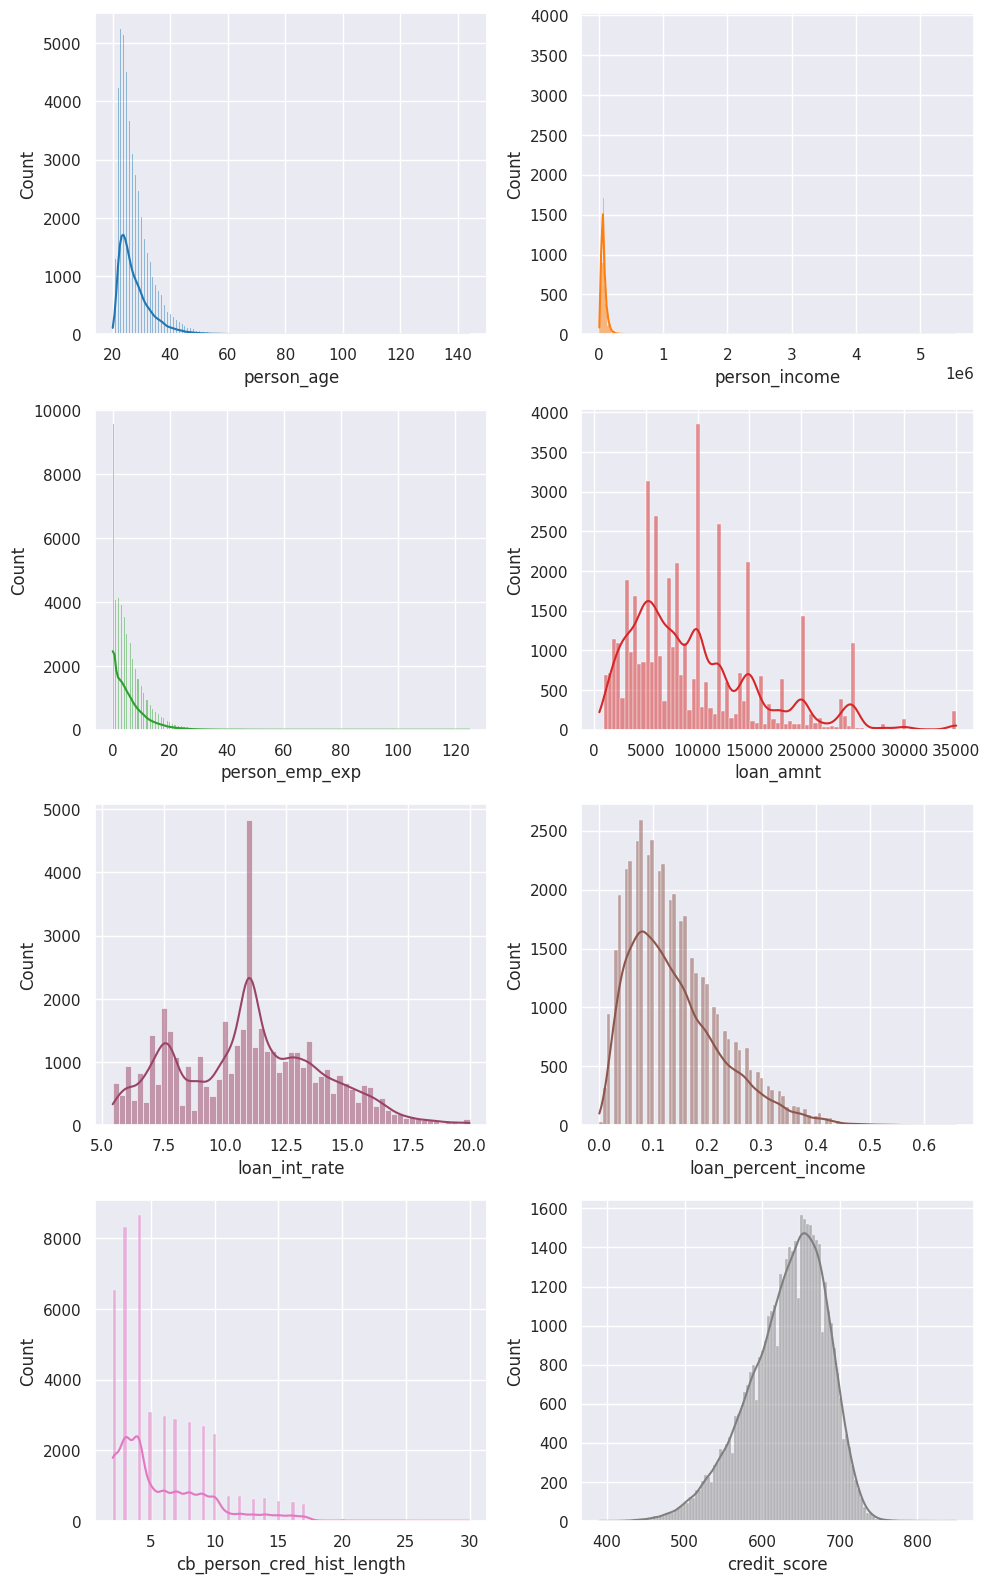

In [ ]:
sns.set(style="darkgrid")
num_cols = len(numeric_columns)
num_rows = (num_cols + 1) // 2

fig, axs = plt.subplots(num_rows, 2, figsize=(10, 4 * num_rows))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


for i, col in enumerate(numeric_columns):
    row = i // 2
    col_idx = i % 2
    sns.histplot(data=df, x=col, kde=True, ax=axs[row, col_idx], color=colors[i % len(colors)])
    # Use modulo operator to cycle through colors if needed

plt.tight_layout()
plt.show()

Sebagian besar kolom numerik dalam dataset ini menunjukkan distribusi yang tidak normal dan cenderung **right-skewed**.

Kolom seperti person_age, person_income, person_emp_exp, loan_amnt, dan cb_person_cred_hist_length semuanya memperlihatkan nilai mayoritas terkonsentrasi di rentang rendah, sementara sebagian kecil data memiliki nilai yang jauh lebih tinggi—menandakan keberadaan outlier.

Kolom loan_int_rate dan loan_percent_income juga menunjukkan penyebaran yang miring ke kanan, meskipun masih terlihat pola yang lebih bervariasi.

Satu-satunya kolom numerik yang mendekati distribusi normal adalah credit_score, yang memperlihatkan bentuk kurva lonceng (bell-shaped), menandakan distribusi data yang simetris.

**HeatMap**

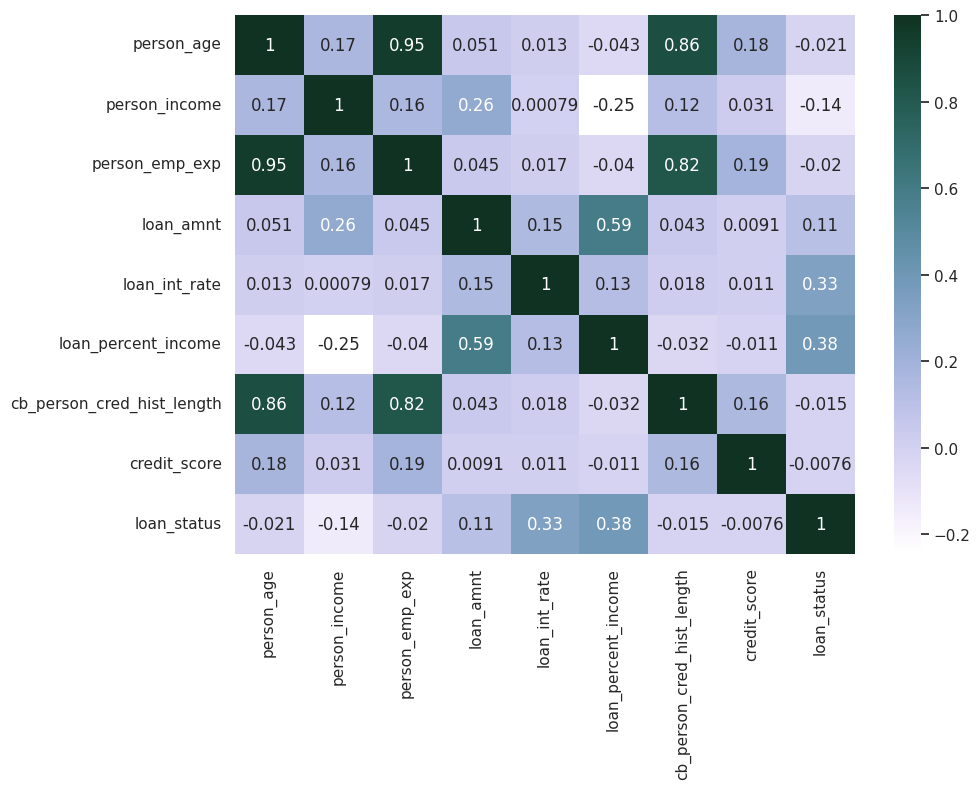

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True, light=1, start=2, rot=0.4));

**loan_percent_income dengan korelasi sebesar 0.38**
- Menunjukkan semakin besar persentase penghasilan yang digunakan untuk membayar cicilan, semakin besar kemungkinan pinjaman disetujui. Hal ini bisa mengindikasikan bahwa peminjam yang rela membayar cicilan besar dianggap serius atau berkomitmen oleh pemberi pinjaman, meskipun ini juga bisa meningkatkan risiko gagal bayar.

**loan_int_rate dengan korelasi sebesar 0.33**
- Menunjukkan semakin tinggi suku bunga pinjaman, semakin besar kemungkinan disetujui. Kemungkinan karena pinjaman berbunga tinggi lebih menguntungkan bagi pihak pemberi pinjaman.

**loan_amnt dengan korelasi sebesar 0.11**
- Menunjukkan pinjaman dengan nominal lebih besar sedikit lebih cenderung disetujui, meskipun pengaruhnya tidak sekuat dua fitur sebelumnya.

Fitur lain seperti **loan_amnt dan person_income** memiliki korelasi **sangat rendah** terhadap loan_status, masing-masing sebesar **0.012 dan -0.14**.

Selain itu, sebagian besar korelasi antar fitur menunjukkan nilai yang rendah, menandakan minimnya multikolinearitas, kecuali a**ntara person_age dan person_emp_exp (0.95)** dan **loan_amnt dan loan_percent_income (0.59)**, yang berarti kedua pasang fitur ini sangat berkaitan.

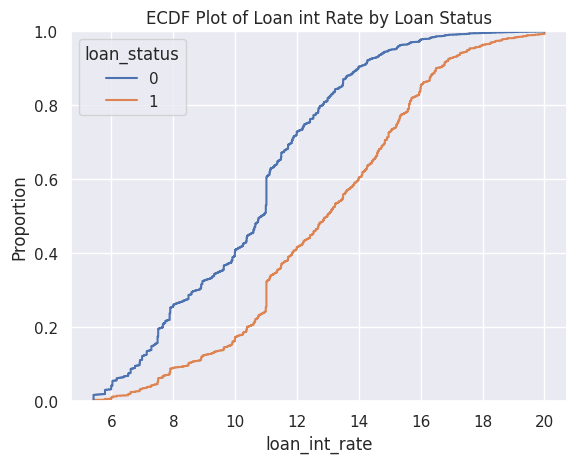

In [ ]:
sns.ecdfplot(data=df, x='loan_int_rate', hue='loan_status')
plt.title("ECDF Plot of Loan int Rate by Loan Status")
plt.show()

Garis orange (disetujui) cenderung bergeser ke kanan → pemohon yang suku bunganya lebih tinggi cenderung lebih sering disetujui.

Semakin tinggi bunga, semakin mungkin pinjaman disetujui (karena lebih menguntungkan bagi pemberi pinjaman).

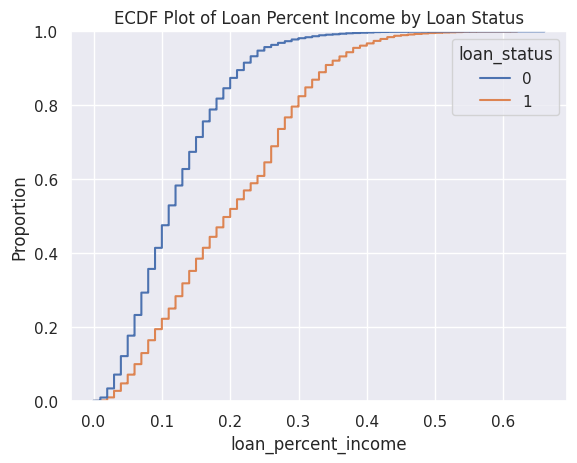

In [ ]:
sns.ecdfplot(data=df, x='loan_percent_income', hue='loan_status')
plt.title("ECDF Plot of Loan Percent Income by Loan Status")
plt.show()


Pemohon yang rela mengalokasikan bagian lebih besar dari penghasilannya untuk membayar pinjaman, cenderung lebih sering disetujui.

Semakin besar proporsi penghasilan yang digunakan untuk pinjaman, semakin besar peluang disetujui.

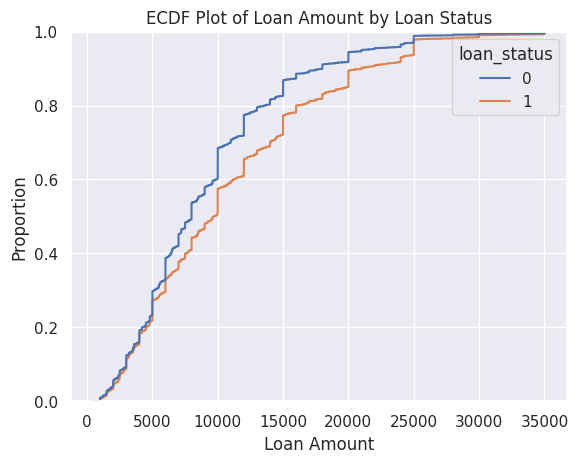

In [ ]:
sns.ecdfplot(data=df, x='loan_amnt', hue='loan_status')
plt.xlabel("Loan Amount")
plt.ylabel("Proportion")
plt.title("ECDF Plot of Loan Amount by Loan Status")
plt.show()


Artinya, pemohon yang disetujui cenderung mengajukan pinjaman dalam jumlah lebih besar dibanding yang ditolak.

Karena selisih antara pemohon yang disetujui dan ditolak nggak terlalu besar. Ini sesuai dengan nilai korelasi 0.11, artinya jumlah pinjaman memang punya sedikit pengaruh terhadap persetujuan, tapi pengaruhnya lemah.

# **Delete Outlier**

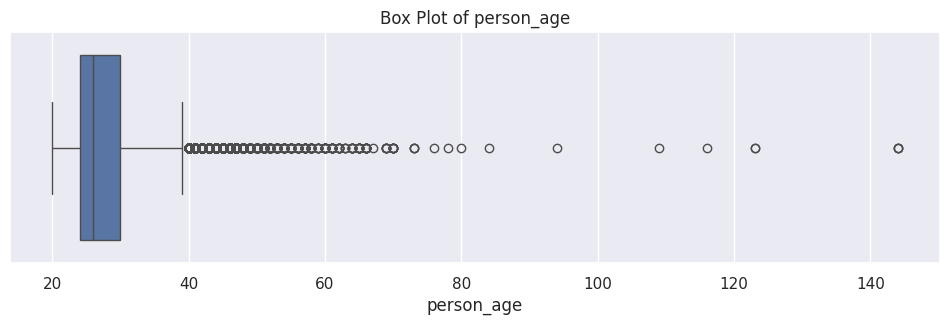

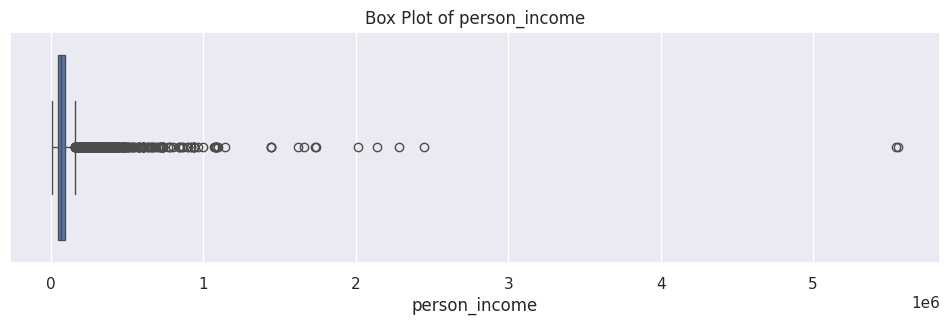

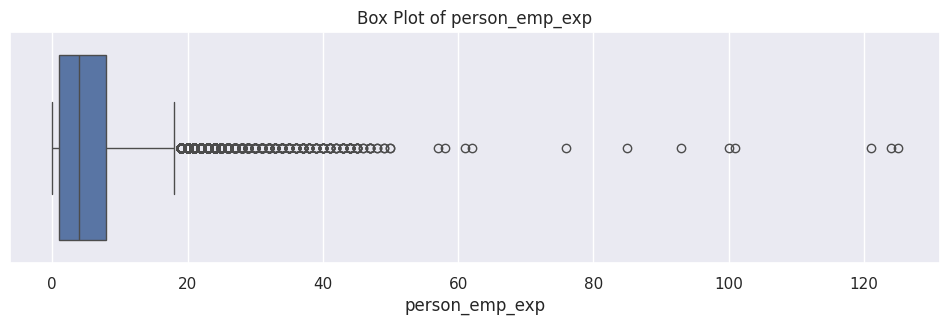

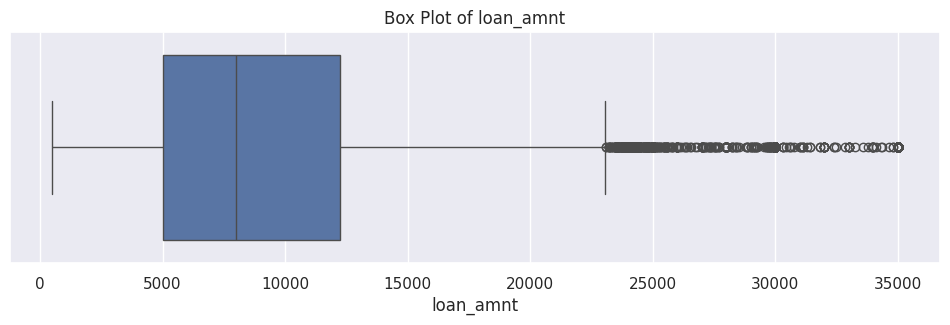

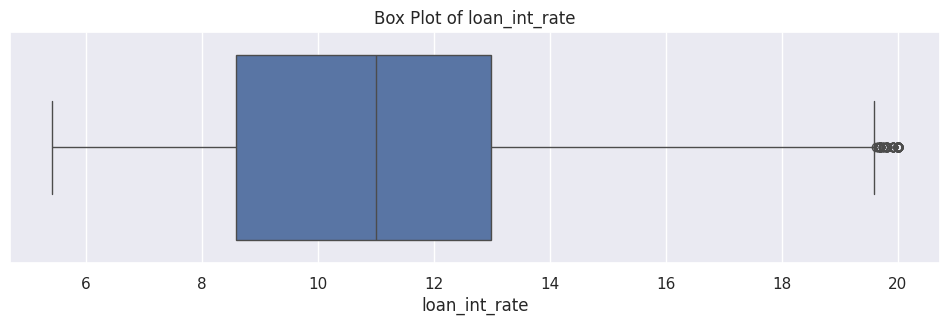

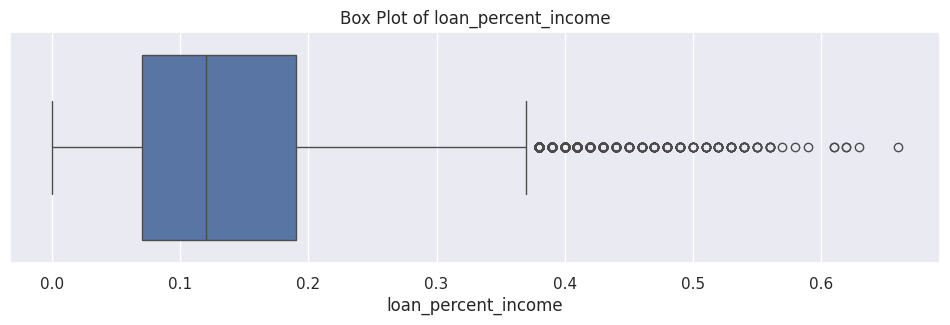

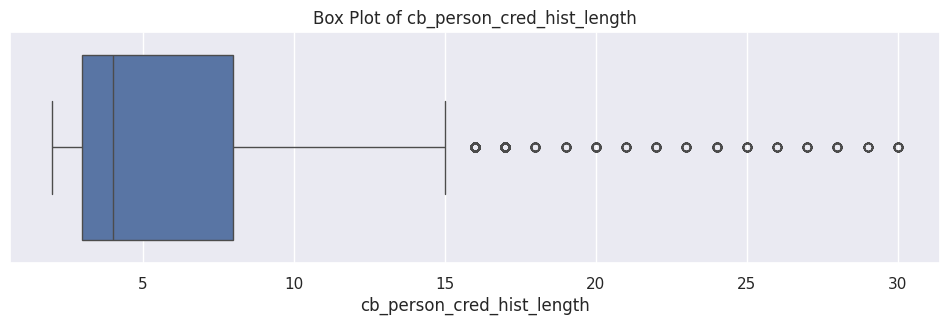

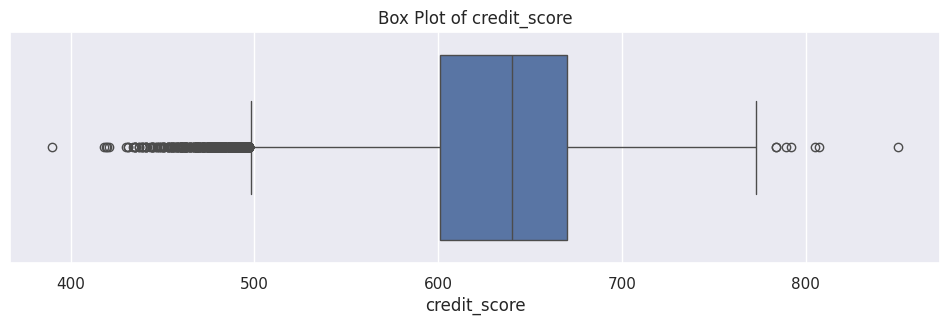

In [ ]:
for col in numeric_columns:
    plt.figure(figsize=(12, 3))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')

In [ ]:
for col_name in numeric_columns:
    # Using IQR
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col_name] = np.where((df[col_name] > upper_bound) | (df[col_name] < lower_bound), np.mean(df[col_name]), df[col_name])

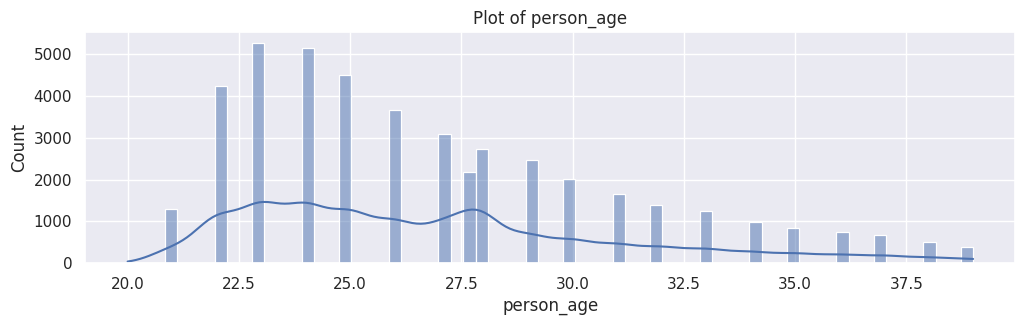

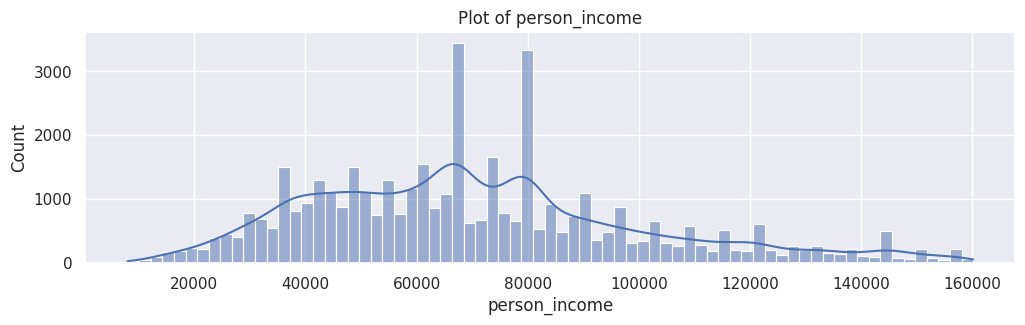

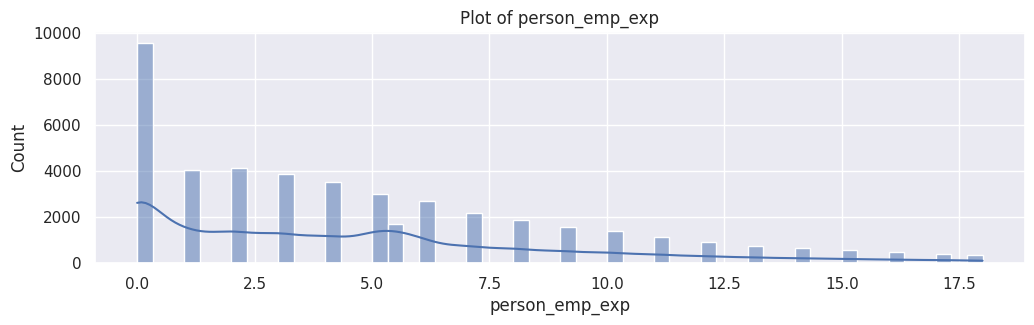

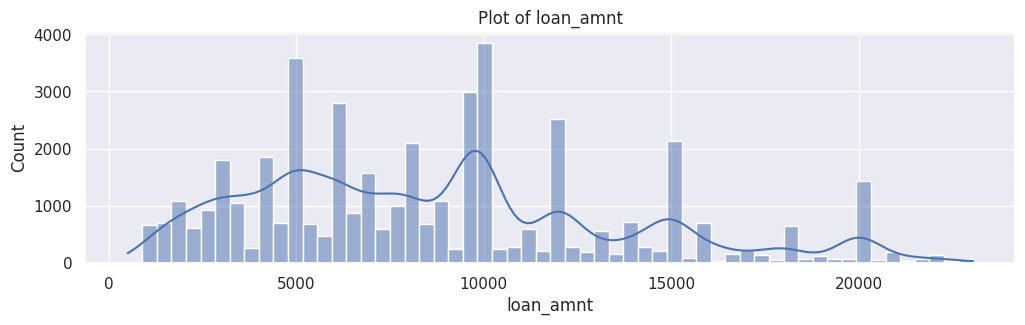

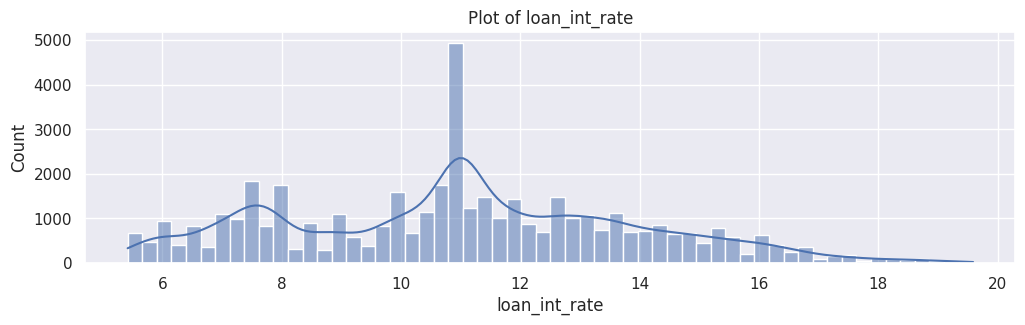

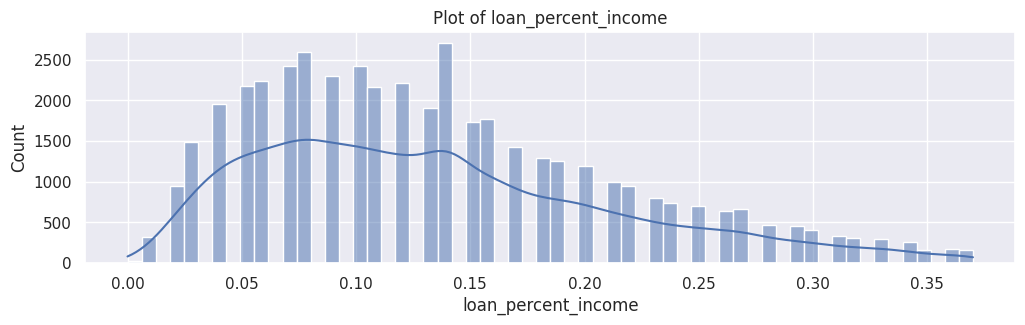

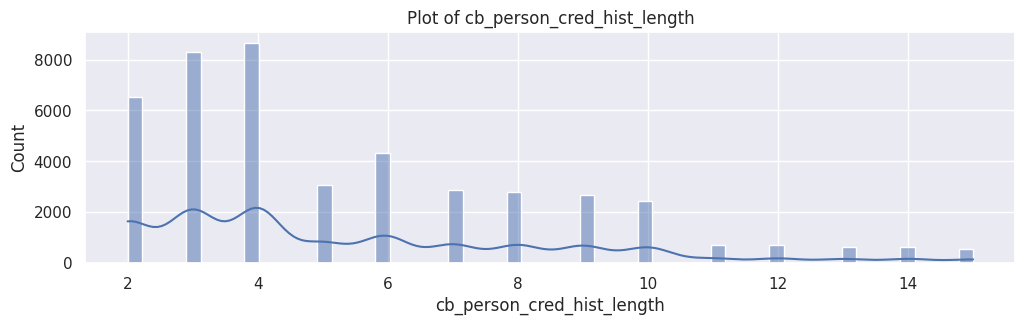

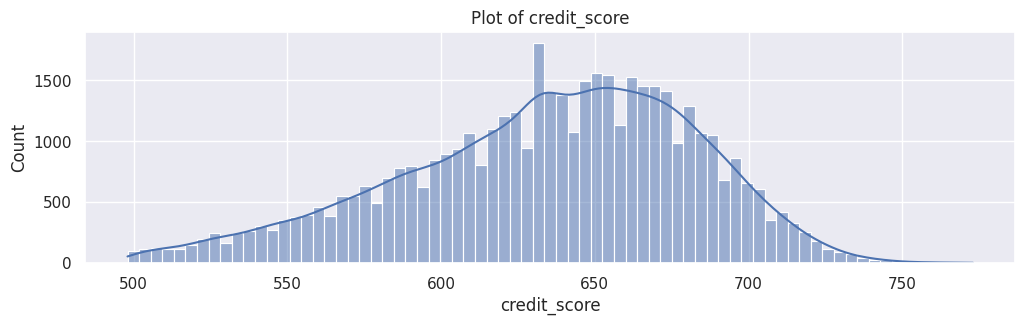

In [ ]:
#numerical plot
for col in numeric_columns:
    plt.figure(figsize=(12, 3))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Plot of {col}')
    plt.xlabel(col)

# **Preprocessing**

In [ ]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
print(categorical_columns)

['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


In [ ]:
for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print()

Unique values in person_gender:
['female' 'male']

Unique values in person_education:
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']

Unique values in person_home_ownership:
['RENT' 'OWN' 'MORTGAGE' 'OTHER']

Unique values in loan_intent:
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

Unique values in previous_loan_defaults_on_file:
['No' 'Yes']



# **One Hot Encoding**

In [ ]:
df = pd.get_dummies(df, columns=['person_gender', 'person_home_ownership', 'loan_intent'], drop_first=True)


Karena 'person_gender', 'person_home_ownership', dan 'loan_intent' adalah fitur nominal (tidak memiliki urutan), maka metode yang tepat untuk mengubahnya ke bentuk numerik adalah One-Hot Encoding. Ini bertujuan agar model tidak salah mengartikan hubungan antar kategori.

#**Ordinal Encode**

In [ ]:
education_map = {
    'High School': 0,
    'Bachelor': 1,
    'Master': 2,
    'Doctorate': 3,
    'Associate': 4
}
df['person_education'] = df['person_education'].map(education_map)


**'person_education'** merupakan **kategorikal ordinal** karena tingkat pendidikan memiliki **urutan atau hierarki**, mulai dari High School hingga Doctorate. Oleh karena itu, metode encoding yang paling sesuai adalah dengan label mapping atau ordinal encoding, di mana setiap tingkat pendidikan diberi nilai numerik berdasarkan urutannya.

# **Binary Encode**

In [ ]:
default_map = {'No': 0, 'Yes': 1}
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map(default_map)

In [ ]:
df

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_gender_male,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,2,71948.0,0.0,9583.157556,16.02,0.139725,3.0,561.0,0,1,False,False,False,True,False,False,False,True,False
1,21.0,0,12282.0,0.0,1000.000000,11.14,0.080000,2.0,504.0,1,0,False,False,True,False,True,False,False,False,False
2,25.0,0,12438.0,3.0,5500.000000,12.87,0.139725,3.0,635.0,0,1,False,False,False,False,False,False,True,False,False
3,23.0,1,79753.0,0.0,9583.157556,15.23,0.139725,2.0,675.0,0,1,False,False,False,True,False,False,True,False,False
4,24.0,2,66135.0,1.0,9583.157556,14.27,0.139725,4.0,586.0,0,1,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,4,47971.0,6.0,15000.000000,15.66,0.310000,3.0,645.0,0,1,True,False,False,True,False,False,True,False,False
44996,37.0,4,65800.0,17.0,9000.000000,14.07,0.140000,11.0,621.0,0,1,False,False,False,True,False,True,False,False,False
44997,33.0,4,56942.0,7.0,2771.000000,10.02,0.050000,10.0,668.0,0,1,True,False,False,True,False,False,False,False,False
44998,29.0,1,33164.0,4.0,12000.000000,13.23,0.360000,6.0,604.0,0,1,True,False,False,True,True,False,False,False,False


# **Features Separating**

In [ ]:
X = df.drop(["loan_status"], axis=1)
y = df["loan_status"]

# **Splitting Dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

Data dibagi menjadi:

80% untuk pelatihan (training set) → digunakan untuk melatih model (X_train, y_train)

20% untuk pengujian (testing set) → digunakan untuk menguji performa model (X_test, y_test)

# **SMOTE Technique**

**SMOTE (Synthetic Minority Over-sampling Technique)** digunakan setelah proses splitting data agar **tidak merusak distribusi data training**. Karena kolom target (loan_status) memiliki ketidakseimbangan kelas (imbalance), di mana jumlah data kelas 0 jauh lebih banyak dari kelas 1, maka SMOTE diterapkan hanya pada data pelatihan (X_train, y_train).

**Visualisasi sebelum SMOTE**

Text(0, 0.5, 'Jumlah')

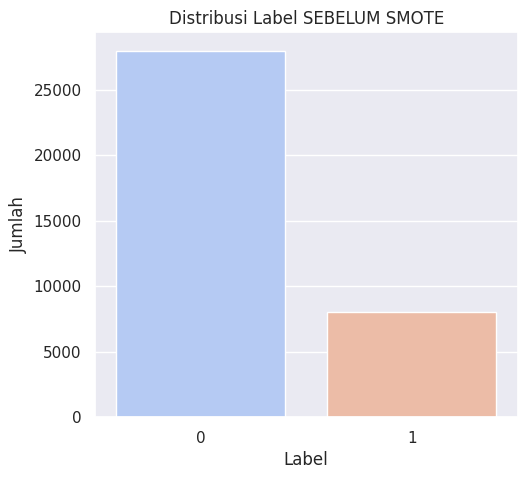

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette="coolwarm")
plt.title("Distribusi Label SEBELUM SMOTE")
plt.xlabel("Label")
plt.ylabel("Jumlah")

**Apply SMOTE hanya ke training data**

In [ ]:
sm = SMOTE(random_state=32)
X_train, y_train = sm.fit_resample(X_train, y_train)

**Visualisasi setelah SMOTE**

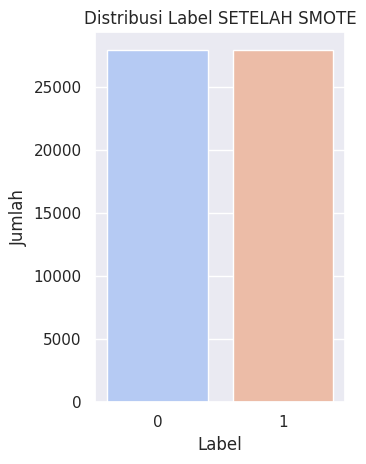

In [ ]:
# Visualisasi setelah SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train, palette="coolwarm")
plt.title("Distribusi Label SETELAH SMOTE")
plt.xlabel("Label")
plt.ylabel("Jumlah")

plt.tight_layout()
plt.show()

# **Scalling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Scaling setelah SMOTE menjaga konsistensi**,  model melihat data (termasuk hasil SMOTE) dalam skala yang konsisten dan siap diproses model.

# **Model**

**Random Forest**

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7028
           1       0.76      0.82      0.79      1972

    accuracy                           0.90      9000
   macro avg       0.86      0.87      0.86      9000
weighted avg       0.91      0.90      0.91      9000


=== Accuracy Score ===
90.4444% Accurate


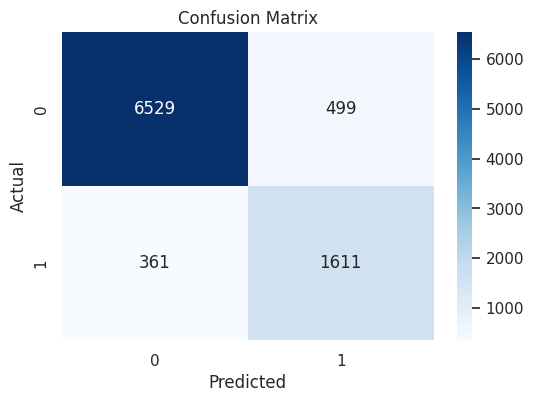

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_pred_RF= RF.predict(X_test)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred_RF))
print("\n=== Accuracy Score ===")
print(f"{accuracy_score(y_test, y_pred_RF)*100:.4f}% Accurate")


cm_rf= confusion_matrix(y_test, y_pred_RF)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Model memiliki akurasi sebesar **90.4%**, artinya sekitar 90 dari 100 prediksi yang dilakukan model adalah benar

**Confusion Matrix**
- 6529 data kelas 0 diprediksi dengan benar (True Negatives)
- 1611 data kelas 1 diprediksi dengan benar (True Positives)
- 499 data kelas 0 salah diprediksi sebagai kelas 1 (False Positives)
- 361 data kelas 1 salah diprediksi sebagai kelas 0 (False Negatives)

**Kelas 0 (Pinjaman Ditolak)**
- **Precision** : 0.95 → Dari semua prediksi ditolak, 95% benar.
- **Recall**: 0.93 → Dari semua kasus sebenarnya ditolak, 93% berhasil dikenali.
- **F1-score**: 0.94 → Kombinasi balance dari precision dan recall.

**Kelas 1 (Pinjaman Disetujui)**
- **Precision**: 0.76 → Dari semua prediksi disetujui, 76% benar.
- **Recall**: 0.82 → Dari semua kasus sebenarnya disetujui, 82% berhasil dikenali.
- **F1-score**: 0.79 → Agak lebih rendah dari kelas 0, tapi tetap oke

**XGBoost**

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7028
           1       0.84      0.83      0.83      1972

    accuracy                           0.93      9000
   macro avg       0.90      0.89      0.89      9000
weighted avg       0.93      0.93      0.93      9000


=== Accuracy Score ===
92.7222% Accurate


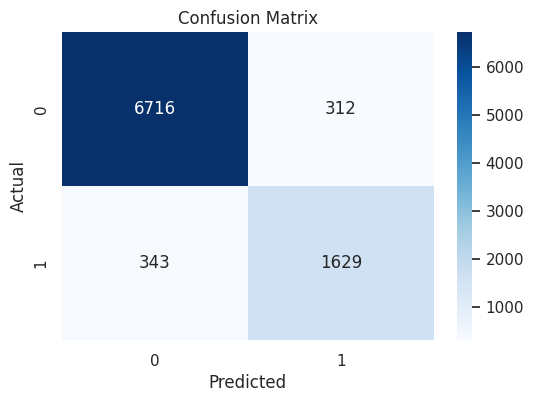

In [ ]:
from sklearn.metrics import classification_report, accuracy_score # Importing accuracy_score

XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_pred_xgb = XGB.predict(X_test)


print("=== Classification Report ===")
print(classification_report(y_test, y_pred_xgb))
print("\n=== Accuracy Score ===")
print(f"{accuracy_score(y_test, y_pred_xgb)*100:.4f}% Accurate")

cm_xgb= confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Model berhasil mencapai akurasi sebesar **92.72%**, yang berarti sekitar 93 dari 100 prediksi yang dilakukan model adalah benar.

**Confusion Matrix**
- 6716 data kelas 0 diprediksi dengan benar (True Negatives)
- 1629 data kelas 1 diprediksi dengan benar (True Positives)
- 312 data kelas 0 salah diprediksi sebagai kelas 1 (False Positives)
- 343 data kelas 1 salah diprediksi sebagai kelas 0 (False Negatives)

**Kelas 0 (Pinjaman Ditolak)**
- **Precision**: 0.95 → Prediksi “ditolak” sangat akurat
- **Recall**: 0.96 → Hampir semua pengajuan yang memang harus ditolak berhasil dikenali
- **F1**: 0.95 →  model sangat baik mengenali pengajuan yang seharusnya ditolak dan jarang salah memprediksi pinjaman yang sebenarnya layak ditolak sebagai "disetujui".


**Kelas 1 (Pinjaman Disetujui)**
- **Precision**: 0.84 → 84% dari prediksi “disetujui” itu benar-benar disetujui
- **Recall**: 0.83 → Model mampu mengenali 83% dari pengajuan yang memang seharusnya disetujui
- **F1-score**: 0.83 → Sangat baik, menandakan keseimbangan antara precision dan recall




# **Hyperparameter Tuning**

**Random Forest**

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=1)

grid_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=3, n_jobs=-1,scoring='f1', verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'log_loss'}


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7028
           1       0.77      0.82      0.79      1972

    accuracy                           0.91      9000
   macro avg       0.86      0.88      0.87      9000
weighted avg       0.91      0.91      0.91      9000


=== Accuracy Score ===
90.7111% Accurate


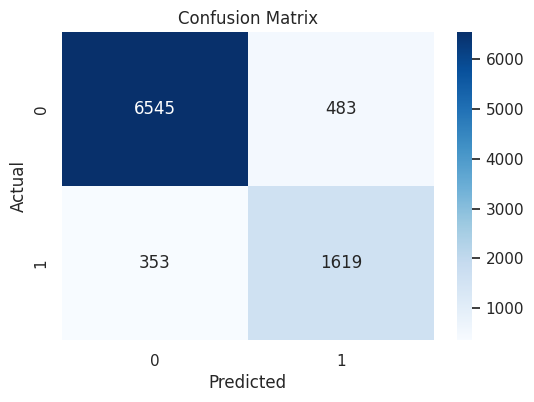

In [ ]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_best_rf))
print("\n=== Accuracy Score ===")
print(f"{accuracy_score(y_test, y_pred_best_rf)*100:.4f}% Accurate")

cm_best_rf= confusion_matrix(y_test, y_pred_best_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm_best_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Model memiliki akurasi sebesar **90.71%,** artinya sekitar 91 dari 100 prediksi yang dilakukan model adalah benar.

**Confusion Matrix**
- 6541 data kelas 0 diprediksi dengan benar (True Negatives)
- 1626 data kelas 1 diprediksi dengan benar (True Positives)
- 487 data kelas 0 salah diprediksi sebagai kelas 1 (False Positives)
- 346 data kelas 1 salah diprediksi sebagai kelas 0 (False Negatives)

**Kelas 0 (Pinjaman Ditolak)**
- **Precision**: 0.95 → Dari semua yang diprediksi ditolak, 95% memang benar-benar ditolak.
- **Recall**: 0.93 → Dari semua pengajuan yang sebenarnya ditolak, 93% berhasil dikenali oleh model.
- **F1-score**: 0.94 → Rata-rata harmonis antara precision dan recall. Model sangat andal untuk mengenali pinjaman yang ditolak.

**Kelas 1 (Pinjaman Disetujui)**
- **Precision**: 0.77 → Dari semua pengajuan yang diprediksi disetujui, 77% memang benar disetujui.
- **Recall**: 0.82 → Dari semua pengajuan yang sebenarnya disetujui, 82% berhasil dikenali oleh model.
- **F1-score**: 0.79 → Masih cukup tinggi, model sudah cukup baik mengenali pengajuan yang layak disetujui.



**XGBoost**

In [ ]:
param_dist = {
    'max_depth': [3, 6, 10, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}

random_search = RandomizedSearchCV(estimator=XGBClassifier(), param_distributions=param_dist,
                                   n_iter=100, cv=3, verbose=2, n_jobs=-1, random_state=42)


random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)

best_model = random_search.best_estimator_

y_pred_xgb_best = best_model.predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 12, 'learning_rate': 0.05, 'gamma': 0.1}


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7028
           1       0.84      0.83      0.83      1972

    accuracy                           0.93      9000
   macro avg       0.90      0.89      0.89      9000
weighted avg       0.93      0.93      0.93      9000


=== Accuracy Score ===
92.7222% Accurate


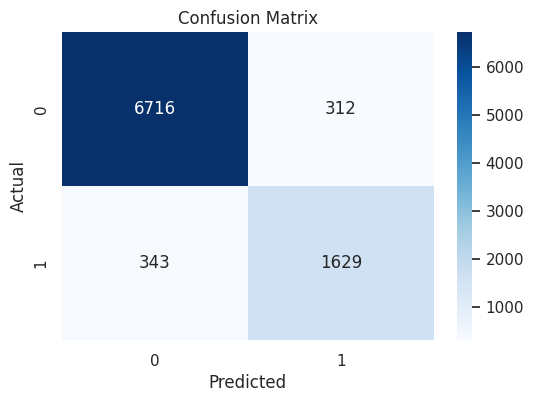

In [ ]:
# Classification report and accuracy score
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_xgb))
print("\n=== Accuracy Score ===")
print(f"{accuracy_score(y_test, y_pred_xgb)*100:.4f}% Accurate")

cm_xgb_best= confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Best parameters found:  {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 12, 'learning_rate': 0.05, 'gamma': 0.1}



**Akurasi Model**
Model memiliki akurasi sebesar **92.72%,** artinya sekitar 93 dari 100 prediksi yang dilakukan model adalah benar.

**Confusion Matrix**
- 6716 data kelas 0 diprediksi dengan benar (True Negatives)
- 1629 data kelas 1 diprediksi dengan benar (True Positives)
- 312 data kelas 0 salah diprediksi sebagai kelas 1 (False Positives)
- 343 data kelas 1 salah diprediksi sebagai kelas 0 (False Negatives)

**Kelas 0 (Pinjaman Ditolak)**
- **Precision**: 0.95 → Dari semua prediksi "ditolak", 95% benar-benar ditolak.
- **Recall**: 0.96 → Dari semua pengajuan yang sebenarnya ditolak, 96% berhasil dikenali oleh model.
- **F1-score**: 0.95 → Sangat tinggi! Menunjukkan bahwa model sangat andal mengenali pinjaman yang seharusnya ditolak.

**Kelas 1 (Pinjaman Disetujui)**
- **Precision**: 0.84 → Dari semua yang diprediksi disetujui, 84% memang benar-benar disetujui.
- **Recall**: 0.83 → Dari semua pengajuan yang sebenarnya disetujui, 83% berhasil dikenali oleh model.
-**F1-score**: 0.83 → Kinerja yang cukup baik! Model cukup konsisten dalam mengenali pengajuan yang layak disetujui.



# **Pickel**

In [ ]:
import pickle

# Save the mappings and the best model
with open('education_map.pkl', 'wb') as f:
    pickle.dump(education_map, f)

with open('default_map.pkl', 'wb') as f:
    pickle.dump(default_map, f)

with open('best_xgb_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
